In [29]:
import numpy as np
#import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
import cv2

In [31]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [32]:
img = cv2.imread('./dataset/ben_afflek/httpcsvkmeuaeccjpg.jpg')

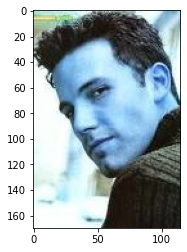

In [33]:
plt.imshow(img)

In [34]:
img = cv2.imread('./dataset/madonna/httpimgclosermagfrvarclosermagstorageimagesactupeoplebiodestarsmadonnamadonnafreFRmadonnaexactxljpg.jpg')

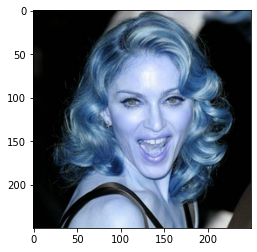

In [35]:
plt.imshow(img)

In [36]:
img.shape

(250, 250, 3)

In [37]:
#img

In [38]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(250, 250)

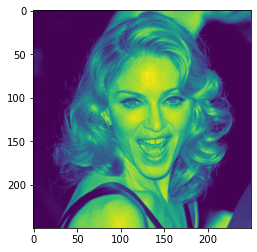

In [39]:
plt.imshow(gray)

In [40]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 79,  60, 119, 119]], dtype=int32)

In [41]:
#type(face_cascade)

In [42]:
faces[0]

array([ 79,  60, 119, 119], dtype=int32)

In [43]:
(x,y,w,h) = faces[0]


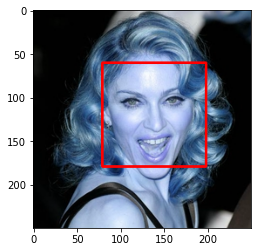

In [44]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

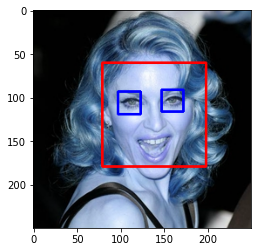

In [45]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

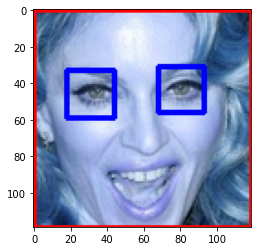

In [46]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')


In [47]:
cropped_img = np.array(roi_color)
cropped_img.shape

(119, 119, 3)

In [48]:

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

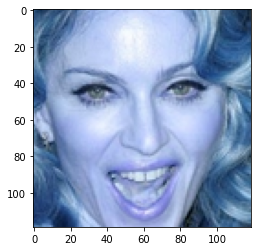

In [49]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/madonna/httpimgclosermagfrvarclosermagstorageimagesactupeoplebiodestarsmadonnamadonnafreFRmadonnaexactxljpg.jpg')
plt.imshow(cropped_image)

In [50]:
#creating dir
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [51]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [52]:
img_dirs

['./dataset/ben_afflek',
 './dataset/elton_john',
 './dataset/jerry_seinfeld',
 './dataset/madonna',
 './dataset/mindy_kaling']

In [53]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [54]:

cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
    


Generating cropped images in folder:  ./dataset/cropped/ben_afflek
Generating cropped images in folder:  ./dataset/cropped/jerry_seinfeld
Generating cropped images in folder:  ./dataset/cropped/madonna
Generating cropped images in folder:  ./dataset/cropped/mindy_kaling


In [55]:
import pywt


In [56]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

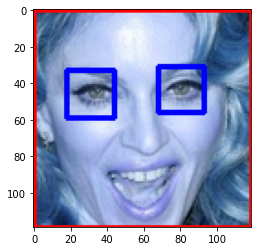

In [57]:
plt.imshow(cropped_img)

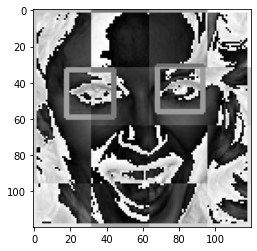

In [58]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [59]:
#celebrity_file_names_dict

In [60]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ben_afflek': 0,
 'elton_john': 1,
 'jerry_seinfeld': 2,
 'madonna': 3,
 'mindy_kaling': 4}

In [61]:
X = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        
        
        
    

In [62]:
X[0]

array([[210],
       [219],
       [246],
       ...,
       [101],
       [ 28],
       [ 11]], dtype=uint8)

In [63]:
len(X)

39

In [64]:
len(X[0])

4096

In [65]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(39, 4096)

In [66]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)


In [80]:
#y

In [69]:
X_train

array([[ 22.,  67., 118., ..., 207., 208.,  49.],
       [ 67.,  79., 113., ...,   0.,   0.,   0.],
       [226., 236., 226., ..., 190., 191., 252.],
       ...,
       [  7.,   5.,   4., ...,  95.,  67., 102.],
       [ 23.,  17.,  28., ..., 234., 229., 227.],
       [210., 219., 246., ..., 101.,  28.,  11.]])

In [70]:
type(X)

numpy.ndarray

In [71]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])

In [72]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9

In [73]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.71      0.75      0.73        10
weighted avg       0.81      0.90      0.85        10



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
y_pred_test = pipe.predict(X_test)

In [75]:
y_pred_test

array([4, 4, 4, 4, 4, 4, 2, 3, 2, 4])

In [76]:
y_test

[0, 4, 4, 4, 4, 4, 2, 3, 2, 4]

In [81]:
len(X_test)

10

In [82]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [83]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [84]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.680000,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.580000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.546667,{'logisticregression__C': 1}


In [86]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [87]:
best_estimators['svm'].score(X_test,y_test)


0.9

In [88]:
best_estimators['random_forest'].score(X_test,y_test)


0.7

In [89]:
best_clf = best_estimators['svm']


In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[0, 0, 0, 1],
       [0, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

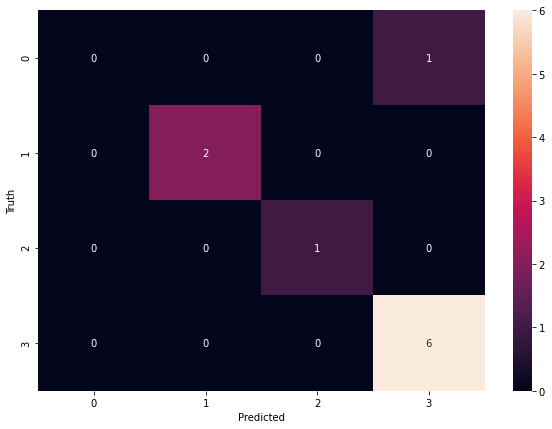

In [91]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [92]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [93]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))